# import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math
from scipy.stats import norm, skew
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_excel("house_details.xlsx")

In [3]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# EDA & Visualization

In [4]:
data.shape

(414, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
data.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
data[data.duplicated()].shape

(0, 9)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Number of bedrooms,414.0,1.987923,0.818875,1.000000,1.000000,2.000000,3.000000,3.000000
House size (sqft),414.0,931.475845,348.910269,402.000000,548.000000,975.000000,1234.750000,1500.000000
House price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


Observations :-
    
1.The mean value and the median value (50% percentile) are not having much difference between them for all the columns except Distance from nearest Metro station (km)


# data visulization

Text(0.5, 1.0, 'Histogram for House size (sqft)')

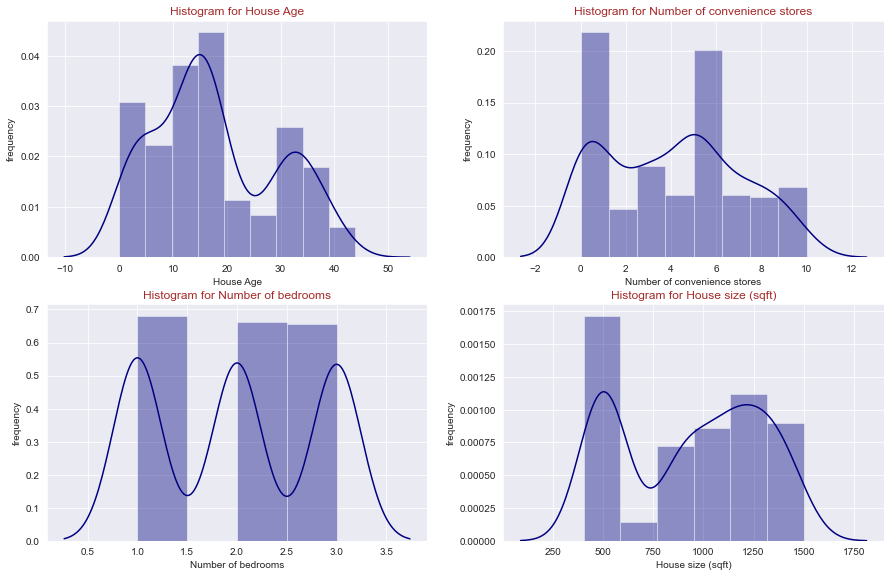

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,20))

plt.subplot(421)
sns.distplot(data["House Age"], color='navy')
plt.xlabel("House Age")
plt.ylabel("frequency")
plt.title ("Histogram for House Age", color='brown')

plt.subplot(422)
sns.distplot(data["Number of convenience stores"], color='navy')
plt.xlabel("Number of convenience stores")
plt.ylabel("frequency")
plt.title ("Histogram for Number of convenience stores", color='brown')

plt.subplot(423)
sns.distplot(data["Number of bedrooms"], color='navy')
plt.xlabel("Number of bedrooms")
plt.ylabel("frequency")
plt.title ("Histogram for Number of bedrooms", color='brown')

plt.subplot(424)
sns.distplot(data["House size (sqft)"], color='navy')
plt.xlabel("House size (sqft)")
plt.ylabel("frequency")
plt.title ("Histogram for House size (sqft)", color='brown')



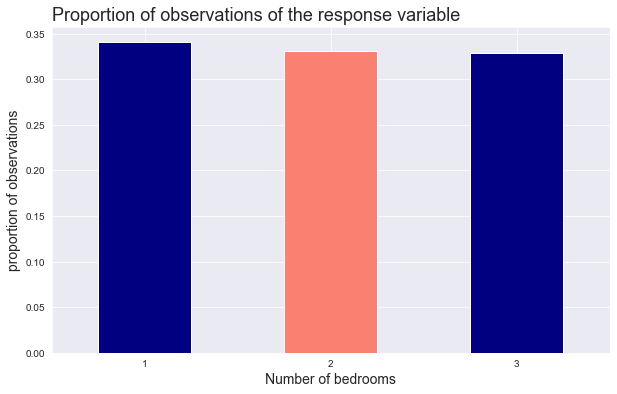

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# proportion of observation of each class

prop_response = data["Number of bedrooms"].value_counts(normalize=True)

# create barplot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['navy','salmon'])

# set titles
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('Number of bedrooms',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

In [11]:
data['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

Text(0.5, 1.0, 'Distribution of house price vs bedrroms')

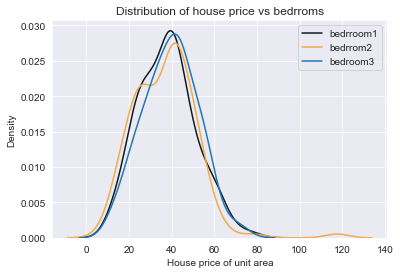

In [12]:
fig = sns.kdeplot(data[data['Number of bedrooms'] == 1]['House price of unit area'], color='#101820FF')
fig = sns.kdeplot(data[data['Number of bedrooms'] == 2]['House price of unit area'], color='#F2AA4CFF')
fig = sns.kdeplot(data[data['Number of bedrooms'] == 3]['House price of unit area'])
fig.legend(["bedrroom1", "bedrrom2", "bedroom3"],loc='upper right')
fig.set_title('Distribution of house price vs bedrroms')

observation - 

According to above visualization we can say here size of bedrrom does not affet house price

In [13]:
data['Number of convenience stores'].value_counts()

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

Text(0.5, 1.0, 'Number of convenience stores')

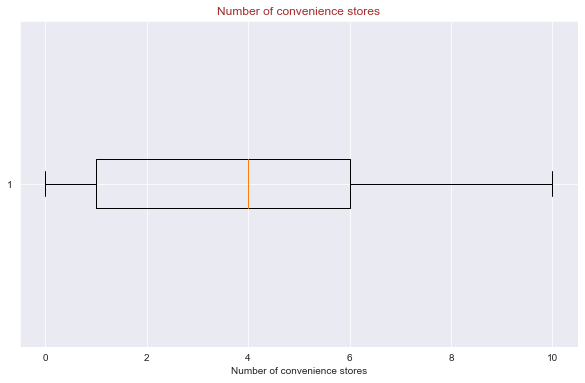

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))

plt.boxplot(data["Number of convenience stores"], vert=False)
plt.xlabel("Number of convenience stores")
plt.title ("Number of convenience stores", color='brown')

Text(0.5, 1.0, 'Boxplot for House size')

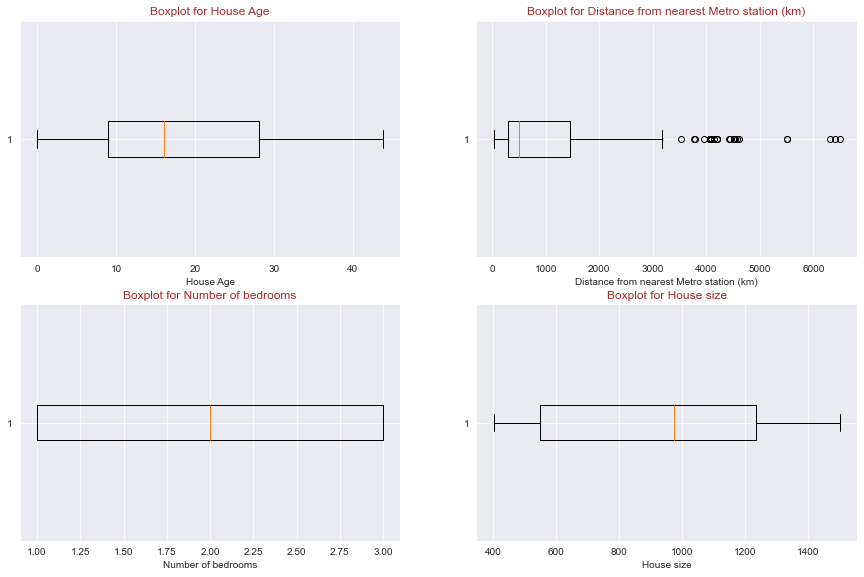

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,20))

plt.subplot(421)
plt.boxplot(data["House Age"], vert=False)
plt.xlabel("House Age")
plt.title ("Boxplot for House Age", color='brown')

plt.subplot(422)
plt.boxplot(data["Distance from nearest Metro station (km)"], vert=False)
plt.xlabel("Distance from nearest Metro station (km)")
plt.title ("Boxplot for Distance from nearest Metro station (km)", color='brown')

plt.subplot(423)
plt.boxplot(data["Number of bedrooms"], vert=False)
plt.xlabel("Number of bedrooms")
plt.title ("Boxplot for Number of bedrooms", color='brown')

plt.subplot(424)
plt.boxplot(data["House size (sqft)"], vert=False)
plt.xlabel("House size")
plt.title ("Boxplot for House size", color='brown')


In [16]:
data.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


<AxesSubplot:>

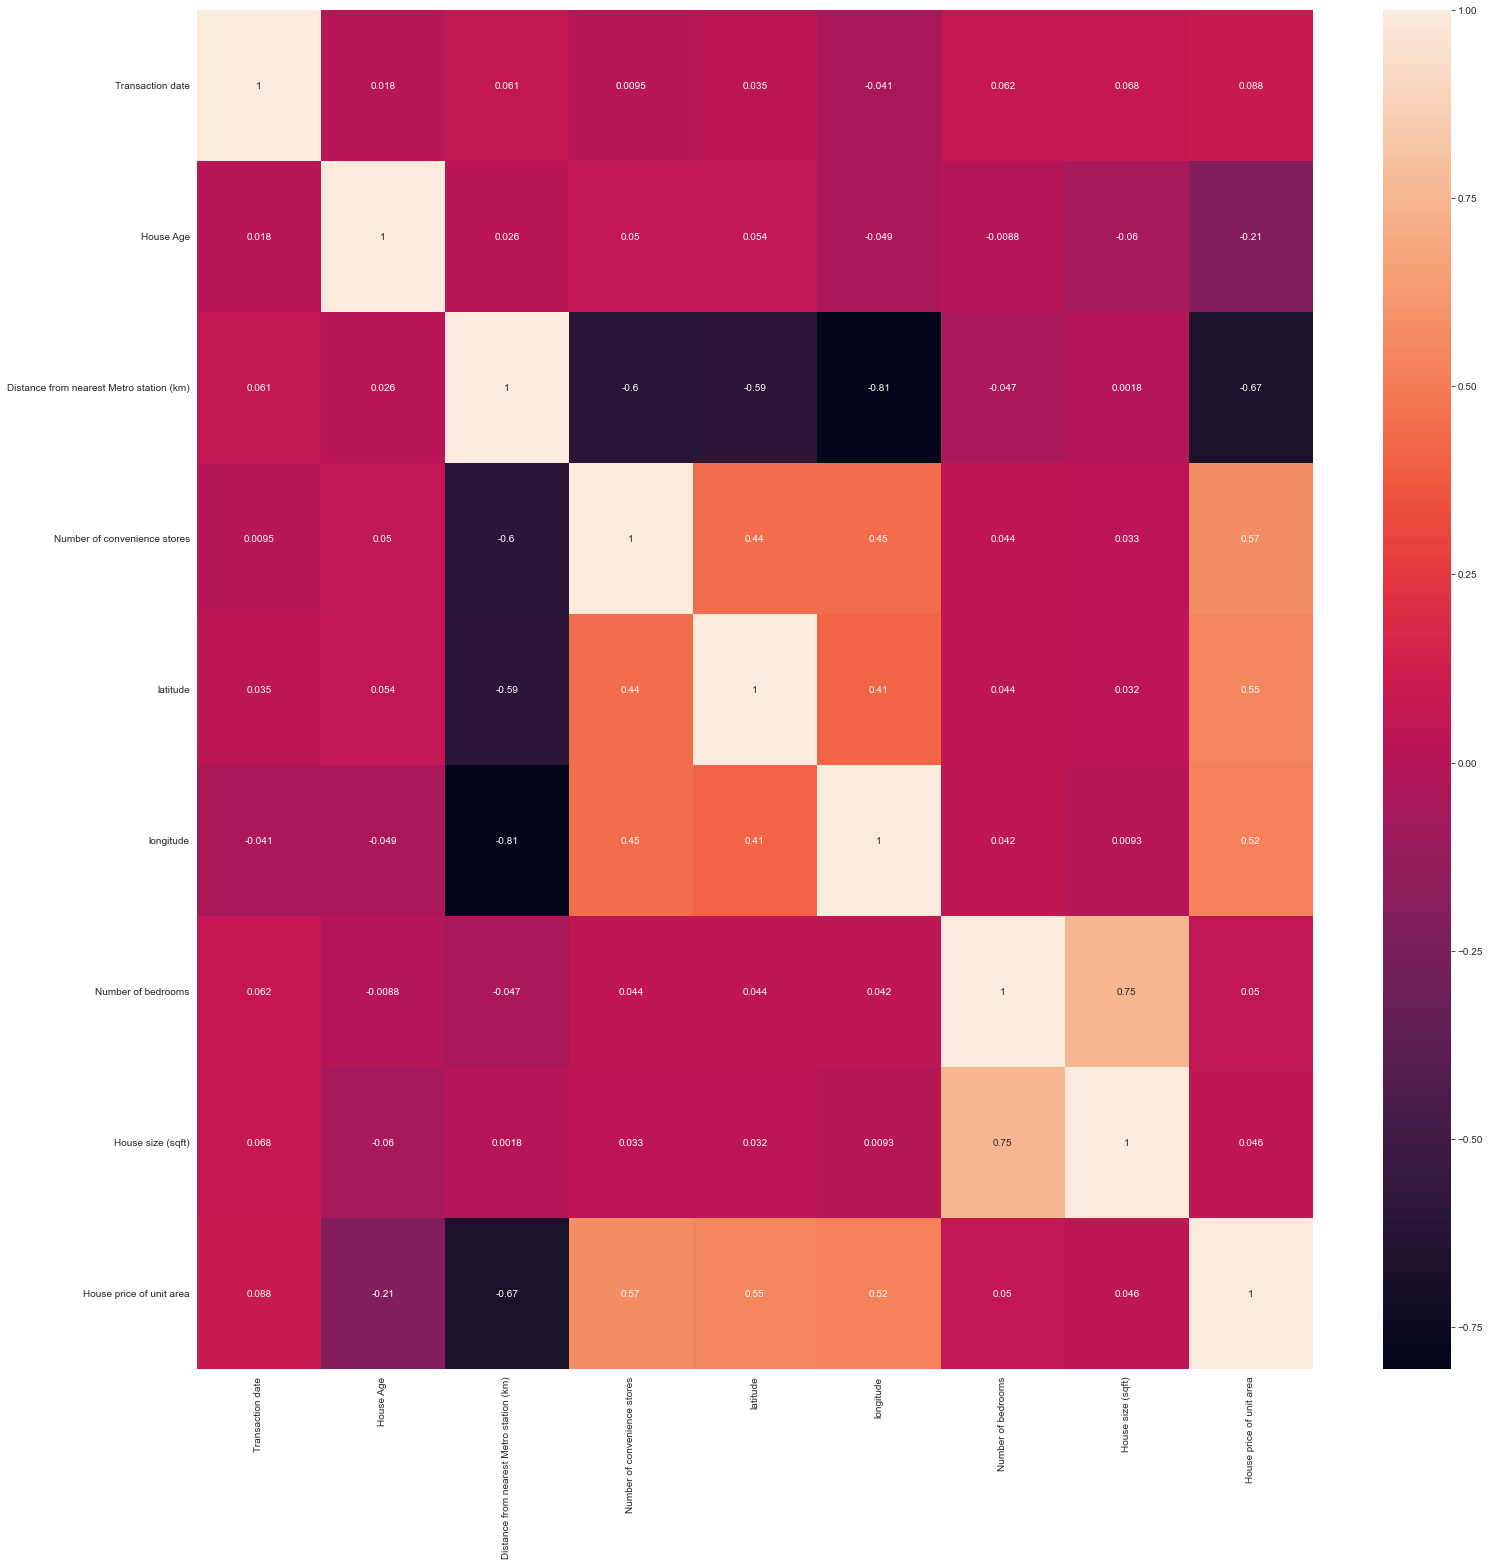

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True, cmap='rocket')

<AxesSubplot:>

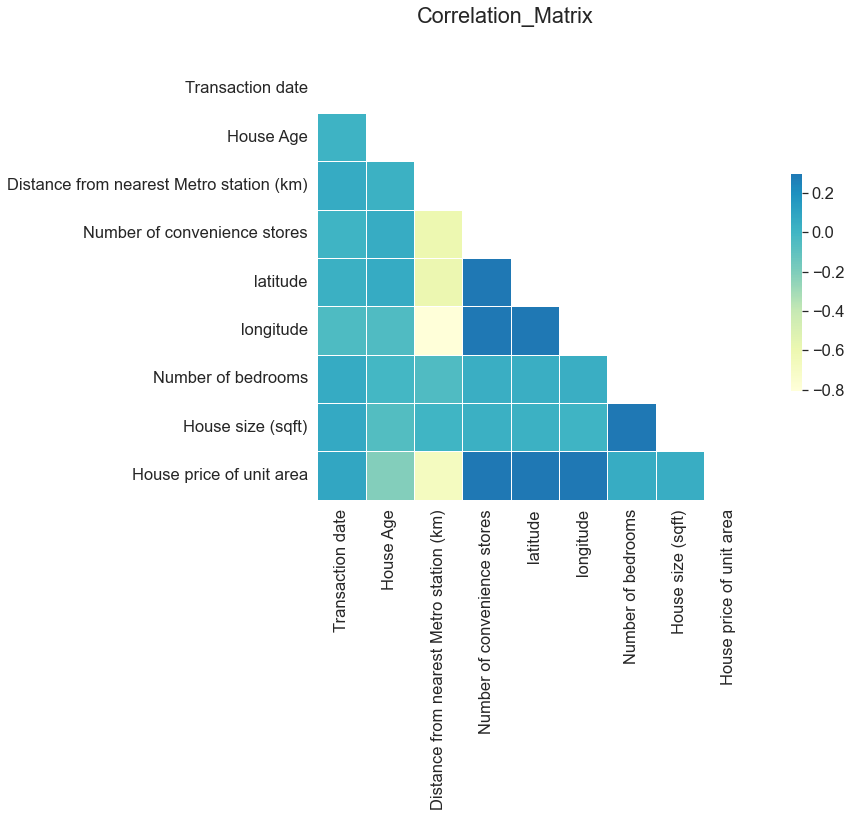

In [18]:
sns.set(style="white", font_scale =1.5)
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
data1 = data.drop(['Distance from nearest Metro station (km)'], axis=1)
data1.head()

,Transaction date,House Age,Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,5,24.97937,121.54245,1,491,43.1


# Divide data into train set and test set

In [23]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=18, n_informative=5, n_redundant=5, random_state=0,n_classes=2,shuffle=False)
feature_names = [f"feature {i}" for i in range(X.shape[1])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [24]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


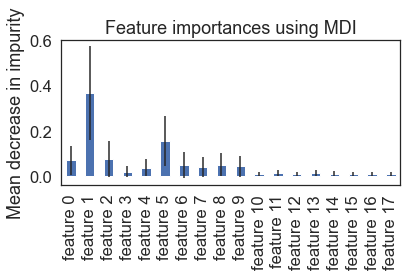

In [25]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# model building

Logestic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
model_logestic = LogisticRegression()
model_logestic.fit(X_train, y_train)
predicted_y_logestic = model_logestic.predict(X_test)
score = accuracy_score(predicted_y_logestic, y_test)
score

0.89